In [17]:
import numpy as np
import pickle as pkl

In [18]:
def unpack_raster(models, data):
	'''
	Take raw simulation outputs and create rasters of equilibrum dynamics,
	equilibrium general resistance and pathogen proportions.

	Args:
		raster: list of outputs from simulation runs	

	Returns:
		eq: Equilibrium dynamics classifications
		q_map: Equilibrium levels of quantitative resistance
		inf_ratio: Proportion of infected hosts
		y_ratio: Equilibrium proportion of endemic pathogen
		h_ratio: Equilibrium proportion of susceptible and resistant genotypes
	'''

	mat_vals = np.zeros(len(models))
	bias_vals = np.zeros(len(models))

	for i, model in enumerate(models):
		mat_vals[i] = model.mat
		bias_vals[i] = model.adult_bias

	#Get parameter values
	x_vals = np.sort(list(set(mat_vals)))
	y_vals = np.sort(list(set(bias_vals)))

	#Get raster dimensions
	n_x = len(x_vals)
	n_y = len(y_vals)

	host_evol, path_evol, host_persist, path_persist = [np.zeros((n_x, n_y)) for _ in range(4)]

	for i, model in enumerate(models):
		x_ind = np.where(x_vals == model.mat)
		y_ind = np.where(y_vals == model.adult_bias)

		Sj, Sa, Ij, Ia = data[i]

		host_evol[y_ind, x_ind] = np.argmax(Sa[:,-1])
		path_evol[y_ind, x_ind] = np.argmax(Ia[:,-1])

		host_persist[y_ind, x_ind] = np.sum(Sa[:,-1])
		path_persist[y_ind, x_ind] = np.sum(Ia[:,-1])
		
	return (host_evol, path_evol, host_persist, path_persist)

In [19]:
coevol_path = 'coevol.p'
host_path = 'host.p'
path_path = 'path.p'

with open(coevol_path, 'rb') as f:
    models_coevol, results_coevol = pkl.load(f)

with open(host_path, 'rb') as f:
    models_host, results_host = pkl.load(f)

with open(path_path, 'rb') as f:
    models_path, results_path = pkl.load(f)

/tmp/ipykernel_5036/3302698438.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(x_labels)
/tmp/ipykernel_5036/3302698438.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_yticklabels(y_labels)
/tmp/ipykernel_5036/3302698438.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(x_labels)
/tmp/ipykernel_5036/3302698438.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_yticklabels(y_labels)


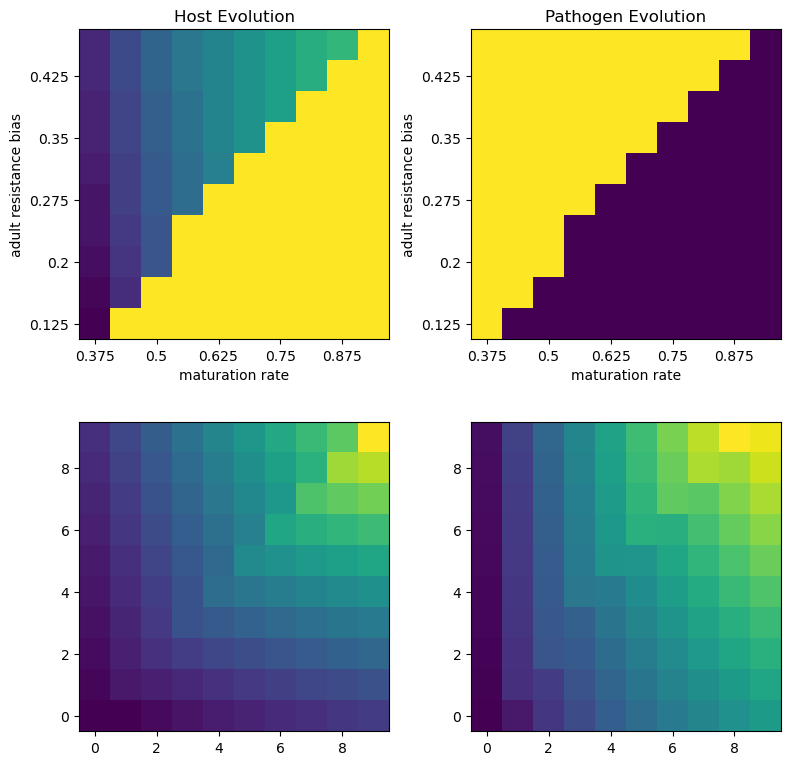

In [20]:
from matplotlib import pyplot as plt

host, path, host_persist, path_persist = unpack_raster(models_coevol, results_coevol)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8,8))

ax[0,0].imshow(host)
ax[0,1].imshow(path)
ax[1,0].imshow(host_persist)
ax[1,1].imshow(path_persist)

ax[0,0].set_title('Host Evolution')
ax[0,0].set_xlabel('maturation rate')
ax[0,0].set_ylabel('adult resistance bias')

ax[0,1].set_title('Pathogen Evolution')
ax[0,1].set_xlabel('maturation rate')
ax[0,1].set_ylabel('adult resistance bias')

n_x_ticks = len(ax[0,0].get_xticklabels())
x_labels = np.round(np.linspace(0.25, 1, n_x_ticks), 3)
n_y_ticks = len(ax[0,0].get_yticklabels())
y_labels = np.round(np.linspace(0.05, 0.5, n_y_ticks), 3)

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,0].set_xticklabels(x_labels)
ax[0,0].set_yticklabels(y_labels)
ax[0,1].set_xticklabels(x_labels)
ax[0,1].set_yticklabels(y_labels)

fig.tight_layout()

/tmp/ipykernel_5036/1160222836.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(x_labels)
/tmp/ipykernel_5036/1160222836.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(y_labels)


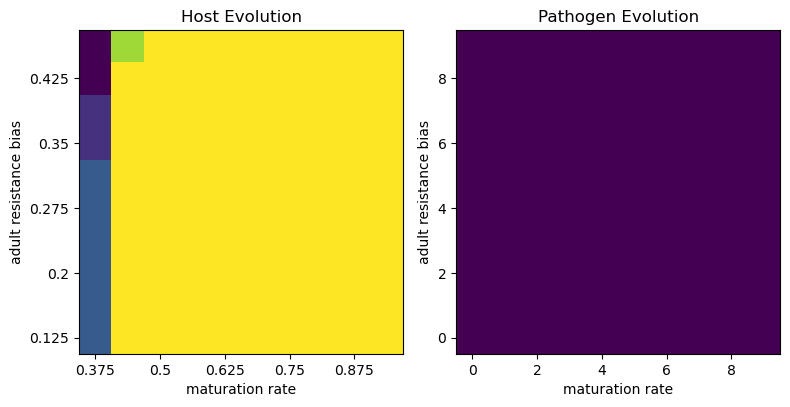

In [21]:
from matplotlib import pyplot as plt

host, _, _, _ = unpack_raster(models_host, results_host)
_, path, _, _ = unpack_raster(models_path, results_path)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,8))

ax[0].imshow(host)
ax[1].imshow(path)

ax[0].set_title('Host Evolution')
ax[0].set_xlabel('maturation rate')
ax[0].set_ylabel('adult resistance bias')

ax[1].set_title('Pathogen Evolution')
ax[1].set_xlabel('maturation rate')
ax[1].set_ylabel('adult resistance bias')

n_x_ticks = len(ax[0].get_xticklabels())
x_labels = np.round(np.linspace(0.25, 1, n_x_ticks), 3)
n_y_ticks = len(ax[0].get_yticklabels())
y_labels = np.round(np.linspace(0.05, 0.5, n_y_ticks), 3)

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_xticklabels(x_labels)
ax[0].set_yticklabels(y_labels)


fig.tight_layout()

In [23]:
path

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
import matplotlib

C1 = matplotlib.colors.to_rgb('#196CA9') #S color
C2 = matplotlib.colors.to_rgb('#56AA6D') #R color

import matplotlib
from PIL import Image

Sj, Sa, Ia, Ij = results[80]

fix, ax1 = plt.subplots()
ax2 = ax1.twinx()

Sa_img = Sa / np.max(Sa)
Ia_img = Ia / np.max(Ia)
Sa_img = np.array(Image.fromarray(Sa).resize(size=(100,100)))
Ia_img = np.array(Image.fromarray(Ia).resize(size=(100,100)))
Sa_img[Sa_img >= 0.2] = 1
Sa_img[Sa_img < 0.2] = 0
Ia_img[Ia_img >= 0.2] = 1
Ia_img[Ia_img < 0.2] = 0

Sa_alpha = np.ones(Sa_img.shape)*0.9
Ia_alpha = np.ones(Ia_img.shape)*0.9
Sa_alpha[Sa_img == 0] = 0
Ia_alpha[Ia_img == 0] = 0

s_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",C1])
i_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",C2])

ax1.imshow(Sa_img, alpha=Sa_alpha, cmap=s_cmap)
ax2.imshow(Ia_img, alpha=Ia_alpha, cmap=i_cmap)

ax1.set_ylabel('Host Genotype', color=C1)
ax2.set_ylabel('Pathogen Genotype', color=C2)
ax1.set_xlabel('Evolutionary Time')

NameError: name 'results' is not defined

In [ ]:
np.max(Ia[:,-1]) > 1

False